# 19CSE304 Data Science Final Assignment
### Name : M V S Karthik
### Roll Number : CB.EN.U4CSE20639
### Section: CSE-F

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

##### A. Data Manipulation-Pandas
##### Q1

In [2]:
birthrate = pd.read_csv('nchs-birth-rates-for-females-by-age-group-united-states.csv')

In [3]:
birthrate

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1997,45-49 years,0.4
2,1987,40-44 years,4.4
3,2015,25-29 years,104.3
4,1945,20-24 years,138.9
...,...,...,...
603,1999,25-29 years,111.2
604,2005,40-44 years,9.1
605,1981,25-29 years,111.5
606,1952,20-24 years,217.6


In [4]:
birthrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        608 non-null    int64  
 1   Age Group   608 non-null    object 
 2   Birth Rate  608 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.4+ KB


In [5]:
birthrate.describe()

,Year,Birth Rate
count,608.000000,608.000000
mean,1977.500000,60.161678
std,21.955474,59.724269
min,1940.000000,0.200000
25%,1958.750000,3.325000
50%,1977.500000,51.050000
75%,1996.250000,105.500000
max,2015.000000,260.600000


###### Indexing

##### Indexing using simple column names and conditions

In [8]:
#selecting multiple columns
#selecting rows with year>=2000
bir_rate_gt2000 = birthrate[birthrate['Year']>=2000]
bir_rate_gt2000.head()

,Year,Age Group,Birth Rate
3,2015,25-29 years,104.3
5,2012,15-19 years,29.4
27,2001,45-49 years,0.5
29,2006,20-24 years,105.5
34,2015,20-24 years,76.8


##### Using loc for indexing

In [9]:
#using loc for indexing for selecting rows
bir_loc = birthrate.set_index('Year')

In [13]:
#selecting rows with year == 2000
bir_loc_data = bir_loc.loc[2000]
bir_loc_data

,Age Group,Birth Rate
Year,,
2000,45-49 years,0.5
2000,40-44 years,8.0
2000,30-34 years,91.2
2000,10-14 years,0.9
2000,20-24 years,109.7
2000,25-29 years,113.5
2000,15-19 years,47.7
2000,35-39 years,39.7


In [16]:
#selecting rows with year == 2002 or 2003 and only birthrate column
bir_loc_data2 = bir_loc.loc[[2002,2003],['Birth Rate']]
bir_loc_data2

,Birth Rate
Year,
2002,0.5
2002,92.6
2002,0.7
2002,41.6
2002,103.1
2002,42.6
2002,8.3
2002,114.7
2003,0.5


##### Using iloc for indexing

In [21]:
#using iloc for indexing
#selecting from 5th to 24th row and 0th and 1st column
bir_iloc = birthrate.iloc[5:25,[0,1]]
bir_iloc

,Year,Age Group
5,2012,15-19 years
6,1997,40-44 years
7,1947,15-19 years
8,1992,10-14 years
9,1953,10-14 years
10,1942,25-29 years
11,1987,30-34 years
12,1997,25-29 years
13,1987,15-19 years
14,1971,40-44 years


##### Missing value manipulation

In [22]:
birthrate.isna().sum()

Year          0
Age Group     0
Birth Rate    0
dtype: int64

In [23]:
birthrate.isnull().sum()

Year          0
Age Group     0
Birth Rate    0
dtype: int64

Here there are no missing values, i.e., there are no values with value NA or NULL so we cannot do the missing value manipulation.


But still the syntax for handling missing values is as follows :

In [25]:
birthrate.fillna(method='ffill')
# The ffill method actually checks for na values and if it is 
#there than that na value will be replaced by previous non na value

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1997,45-49 years,0.4
2,1987,40-44 years,4.4
3,2015,25-29 years,104.3
4,1945,20-24 years,138.9
...,...,...,...
603,1999,25-29 years,111.2
604,2005,40-44 years,9.1
605,1981,25-29 years,111.5
606,1952,20-24 years,217.6


##### Merging, concating, appending and Joining

Concating:

    For concating we need 2 data frames. So let us split the birthrate df into 2

In [30]:
br1 = birthrate.iloc[:256,:]
br2 = birthrate.iloc[256:352,:]
br3 = birthrate.iloc[352:,:]

In [31]:
br1

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1997,45-49 years,0.4
2,1987,40-44 years,4.4
3,2015,25-29 years,104.3
4,1945,20-24 years,138.9
...,...,...,...
251,1945,10-14 years,0.8
252,1998,30-34 years,85.2
253,1968,35-39 years,35.4
254,1957,20-24 years,260.6


In [32]:
br2

,Year,Age Group,Birth Rate
256,2001,10-14 years,0.8
257,1985,35-39 years,24.0
258,1985,30-34 years,69.1
259,1966,45-49 years,0.7
260,1991,15-19 years,61.8
...,...,...,...
347,1995,40-44 years,6.6
348,1975,20-24 years,113.0
349,1978,15-19 years,51.5
350,1958,45-49 years,0.9


In [33]:
br3

,Year,Age Group,Birth Rate
352,1983,35-39 years,22.0
353,1945,35-39 years,56.9
354,1971,25-29 years,134.1
355,1965,40-44 years,12.8
356,1961,35-39 years,55.6
...,...,...,...
603,1999,25-29 years,111.2
604,2005,40-44 years,9.1
605,1981,25-29 years,111.5
606,1952,20-24 years,217.6


In [36]:
#concating in order 1,3,2
concat_br = pd.concat([br1,br3,br2])
concat_br.head(260).tail(10)
#obeserve that they are merged according to given order

,Year,Age Group,Birth Rate
250,1940,30-34 years,83.4
251,1945,10-14 years,0.8
252,1998,30-34 years,85.2
253,1968,35-39 years,35.4
254,1957,20-24 years,260.6
255,1974,45-49 years,0.3
352,1983,35-39 years,22.0
353,1945,35-39 years,56.9
354,1971,25-29 years,134.1
355,1965,40-44 years,12.8


##### Appending

In [37]:
par_app = br2.append(br3)
app = par_app.append(br1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19480\649050061.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  par_app = br2.append(br3)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19480\649050061.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  app = par_app.append(br1)


In [38]:
app

,Year,Age Group,Birth Rate
256,2001,10-14 years,0.8
257,1985,35-39 years,24.0
258,1985,30-34 years,69.1
259,1966,45-49 years,0.7
260,1991,15-19 years,61.8
...,...,...,...
251,1945,10-14 years,0.8
252,1998,30-34 years,85.2
253,1968,35-39 years,35.4
254,1957,20-24 years,260.6


##### Merging

In [51]:
#for merging let us create 2 dfs seperated by columns
brc1 = birthrate[['Year','Age Group']]
brc2 = birthrate[['Age Group','Birth Rate']]

In [52]:
brc1.head()

,Year,Age Group
0,1947,25-29 years
1,1997,45-49 years
2,1987,40-44 years
3,2015,25-29 years
4,1945,20-24 years


In [53]:
brc2.head()

,Age Group,Birth Rate
0,25-29 years,176.0
1,45-49 years,0.4
2,40-44 years,4.4
3,25-29 years,104.3
4,20-24 years,138.9


In [57]:
mer_br = pd.merge(brc1,brc2,how = 'left',left_on='Age Group',right_on='Age Group')
mer_br
#getting 46208 rows

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1947,25-29 years,104.3
2,1947,25-29 years,142.7
3,1947,25-29 years,108.3
4,1947,25-29 years,161.2
...,...,...,...
46203,1942,45-49 years,0.5
46204,1942,45-49 years,0.4
46205,1942,45-49 years,1.0
46206,1942,45-49 years,0.8


In [59]:
#dropping duplicates for reducing number of rows
mer_br = mer_br.drop_duplicates()
mer_br

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1947,25-29 years,104.3
2,1947,25-29 years,142.7
3,1947,25-29 years,108.3
4,1947,25-29 years,161.2
...,...,...,...
46168,1942,45-49 years,1.7
46170,1942,45-49 years,0.8
46172,1942,45-49 years,1.9
46173,1942,45-49 years,1.4


##### Joining

In [76]:
brj1 = birthrate[['Year','Age Group']]
brj2 = birthrate[['Birth Rate']]

In [77]:
join_br = brj1.join(brj2,lsuffix='1',rsuffix='2',how = 'inner')

In [78]:
join_br.shape

(608, 3)

In [79]:
join_br.head()

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1997,45-49 years,0.4
2,1987,40-44 years,4.4
3,2015,25-29 years,104.3
4,1945,20-24 years,138.9


#### Aggregation

In [81]:
# finding sum, maax, min
birthrate.aggregate({'Year':['sum','max','min','mean'],
                   'Birth Rate': ['sum','max','min','mean']})

,Year,Birth Rate
sum,1202320.0,36578.300000
max,2015.0,260.600000
min,1940.0,0.200000
mean,1977.5,60.161678


##### Grouping

In [82]:
brg = birthrate.groupby('Age Group')

In [83]:
brg

In [88]:
avg_by_groups = brg.mean(['Birth Rate'])

In [91]:
avg_by_groups[['Birth Rate']]

,Birth Rate
Age Group,
10-14 years,0.939474
15-19 years,59.597368
20-24 years,146.236842
25-29 years,134.710526
30-34 years,88.350000
35-39 years,40.843421
40-44 years,9.935526
45-49 years,0.680263


##### Transform

In [92]:
trasns_df  = birthrate[['Year','Birth Rate']]

In [93]:
trasns_df.head()

,Year,Birth Rate
0,1947,176.0
1,1997,0.4
2,1987,4.4
3,2015,104.3
4,1945,138.9


In [94]:
trasns_df.transform(func=['sqrt','exp',lambda x:x/2])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Year               Birth Rate                       
          sqrt  exp <lambda>       sqrt           exp <lambda>
0    44.124823  inf    973.5  13.266499  2.727902e+76    88.00
1    44.687806  inf    998.5   0.632456  1.491825e+00     0.20
2    44.575778  inf    993.5   2.097618  8.145087e+01     2.20
3    44.888751  inf   1007.5  10.212737  1.981137e+45    52.15
4    44.102154  inf    972.5  11.785584  2.106219e+60    69.45
..         ...  ...      ...        ...           ...      ...
603  44.710178  inf    999.5  10.545141  1.965832e+48    55.60
604  44.777226  inf   1002.5   3.016621  8.955293e+03     4.55
605  44.508426  inf    990.5  10.559356  2.653596e+48    55.75
606  44.181444  inf    976.0  14.751271  3.180382e+94   108.80
607  44.068129  inf    971.0   1.264911  4.953032e+00     0.80

[608 rows x 6 columns]

##### Apply

In [96]:
def calc_sum(x):
    return x.sum()
xappdf = trasns_df.apply(calc_sum)

In [97]:
xappdf

Year          1202320.0
Birth Rate      36578.3
dtype: float64

##### Pivot tables

In [108]:
p_table = pd.pivot_table(birthrate,aggfunc=np.mean,index =['Age Group'],columns=['Year'],values='Birth Rate')

In [109]:
p_table

Year,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Age Group,,,,,,,,,,,,,,,,,,,,,
10-14 years,0.7,0.7,0.7,0.8,0.8,0.8,0.7,0.9,1.0,1.0,...,0.6,0.6,0.6,0.5,0.4,0.4,0.4,0.3,0.3,0.2
15-19 years,54.1,56.9,61.1,61.7,54.3,51.1,59.3,79.3,81.8,83.4,...,41.1,41.5,40.2,37.9,34.2,31.3,29.4,26.5,24.2,22.3
20-24 years,135.6,145.4,165.1,164.0,151.8,138.9,181.8,209.7,200.3,200.1,...,105.5,105.4,101.8,96.2,90.0,85.3,83.1,80.7,79.0,76.8
25-29 years,122.8,128.7,142.7,147.8,136.5,132.2,161.2,176.0,163.4,165.4,...,118.0,118.1,115.0,111.5,108.3,107.2,106.5,105.5,105.8,104.3
30-34 years,83.4,85.3,91.8,99.5,98.1,100.2,108.9,111.9,103.7,102.1,...,98.9,100.6,99.4,97.5,96.5,96.5,97.3,98.0,100.8,101.5
35-39 years,46.3,46.1,47.9,52.8,54.6,56.9,58.7,58.9,54.5,53.5,...,47.5,47.6,46.8,46.1,45.9,47.2,48.3,49.3,51.0,51.8
40-44 years,15.6,15.0,14.7,15.7,16.1,16.6,16.5,16.6,15.7,15.3,...,9.4,9.6,9.9,10.0,10.2,10.3,10.4,10.4,10.6,11.0
45-49 years,1.9,1.7,1.6,1.5,1.4,1.6,1.5,1.4,1.3,1.3,...,0.6,0.6,0.7,0.7,0.7,0.7,0.7,0.8,0.8,0.8


# B) Time Series

# Q2)

In [1]:
path = "C:\\Users\\HP\\Fremont_Bridge_Bicycle_Counter.csv"

In [4]:
df = pd.read_csv(path)
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,08/01/2022 12:00:00 AM,23.0,7.0,16.0
1,08/01/2022 01:00:00 AM,12.0,5.0,7.0
2,08/01/2022 02:00:00 AM,3.0,0.0,3.0
3,08/01/2022 03:00:00 AM,5.0,2.0,3.0
4,08/01/2022 04:00:00 AM,10.0,2.0,8.0
...,...,...,...,...
87595,09/30/2022 07:00:00 PM,168.0,57.0,111.0
87596,09/30/2022 08:00:00 PM,73.0,33.0,40.0
87597,09/30/2022 09:00:00 PM,69.0,30.0,39.0
87598,09/30/2022 10:00:00 PM,51.0,10.0,41.0


In [5]:
Dates = df["Date"]
df["Date"] = pd.to_datetime(Dates)

In [6]:
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2022-08-01 00:00:00,23.0,7.0,16.0
1,2022-08-01 01:00:00,12.0,5.0,7.0
2,2022-08-01 02:00:00,3.0,0.0,3.0
3,2022-08-01 03:00:00,5.0,2.0,3.0
4,2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...,...
87595,2022-09-30 19:00:00,168.0,57.0,111.0
87596,2022-09-30 20:00:00,73.0,33.0,40.0
87597,2022-09-30 21:00:00,69.0,30.0,39.0
87598,2022-09-30 22:00:00,51.0,10.0,41.0


In [7]:
df = df.set_index('Date')

In [8]:
df['2015']

C:\Users\HP\AppData\Local\Temp\ipykernel_20484\3483409441.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2015']


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2015-01-01 00:00:00,13.0,4.0,9.0
2015-01-01 01:00:00,27.0,4.0,23.0
2015-01-01 02:00:00,19.0,5.0,14.0
2015-01-01 03:00:00,6.0,0.0,6.0
2015-01-01 04:00:00,5.0,2.0,3.0
...,...,...,...
2015-12-31 19:00:00,23.0,10.0,13.0
2015-12-31 20:00:00,12.0,2.0,10.0
2015-12-31 21:00:00,16.0,8.0,8.0


In [9]:
df['2015' : '2016']

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2015-01-01 00:00:00,13.0,4.0,9.0
2015-01-01 01:00:00,27.0,4.0,23.0
2015-01-01 02:00:00,19.0,5.0,14.0
2015-01-01 03:00:00,6.0,0.0,6.0
2015-01-01 04:00:00,5.0,2.0,3.0
...,...,...,...
2016-12-31 19:00:00,10.0,6.0,4.0
2016-12-31 20:00:00,9.0,3.0,6.0
2016-12-31 21:00:00,10.0,4.0,6.0


# Resample, shifting and windowing

In [10]:
df_monthly = df.resample('M').mean()

In [11]:
df_monthly

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,94.389368,48.511494,45.877874
2012-11-30,70.343056,36.197222,34.145833
2012-12-31,48.883065,25.010753,23.872312
2013-01-31,60.327957,30.793011,29.534946
2013-02-28,74.444940,38.538690,35.906250
...,...,...,...
2022-05-31,98.783602,40.392473,58.391129
2022-06-30,118.415278,47.611111,70.804167
2022-07-31,134.262097,54.848118,79.413978


In [12]:
df.shift(100)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,NaN,NaN,NaN
2022-08-01 01:00:00,NaN,NaN,NaN
2022-08-01 02:00:00,NaN,NaN,NaN
2022-08-01 03:00:00,NaN,NaN,NaN
2022-08-01 04:00:00,NaN,NaN,NaN
...,...,...,...
2022-09-30 19:00:00,211.0,71.0,140.0
2022-09-30 20:00:00,290.0,96.0,194.0
2022-09-30 21:00:00,478.0,162.0,316.0


In [13]:
rolling = df.rolling(365, center=True)

In [14]:
rolling

Rolling [window=365,center=True,axis=0,method=single]

# Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn
df = pd.read_csv(path)
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,08/01/2022 12:00:00 AM,23.0,7.0,16.0
1,08/01/2022 01:00:00 AM,12.0,5.0,7.0
2,08/01/2022 02:00:00 AM,3.0,0.0,3.0
3,08/01/2022 03:00:00 AM,5.0,2.0,3.0
4,08/01/2022 04:00:00 AM,10.0,2.0,8.0
...,...,...,...,...
87595,09/30/2022 07:00:00 PM,168.0,57.0,111.0
87596,09/30/2022 08:00:00 PM,73.0,33.0,40.0
87597,09/30/2022 09:00:00 PM,69.0,30.0,39.0
87598,09/30/2022 10:00:00 PM,51.0,10.0,41.0


<AxesSubplot:>

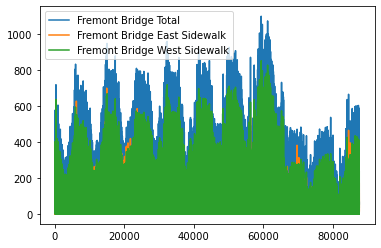

In [16]:
df.plot()

In [ ]:
weekly = df.resample('W').sum()
weekly

In [ ]:
weekly.plot(style=[':' '.', '-'])

# Part B Question 3

In [18]:
path = 'https://raw.githubusercontent.com/wangruinju/python-for-data-analysis/master/pydata-book-2nd-edition/examples/stock_px_2.csv'

In [19]:
df = pd.read_csv(path)

In [20]:
df

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


# Indexing

In [21]:
df[0:10]

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93
5,2003-01-09 00:00:00,7.34,21.93,29.44,927.57
6,2003-01-10 00:00:00,7.36,21.97,29.03,927.57
7,2003-01-13 00:00:00,7.32,22.16,28.91,926.26
8,2003-01-14 00:00:00,7.30,22.39,29.17,931.66
9,2003-01-15 00:00:00,7.22,22.11,28.77,918.22


In [22]:
df['AAPL'][0:10]

0    7.40
1    7.45
2    7.45
3    7.43
4    7.28
5    7.34
6    7.36
7    7.32
8    7.30
9    7.22
Name: AAPL, dtype: float64

# Selection

In [23]:
df["AAPL"]

0         7.40
1         7.45
2         7.45
3         7.43
4         7.28
         ...  
2209    388.81
2210    400.29
2211    402.19
2212    408.43
2213    422.00
Name: AAPL, Length: 2214, dtype: float64

In [24]:
df[["AAPL", "MSFT"]]

,AAPL,MSFT
0,7.40,21.11
1,7.45,21.14
2,7.45,21.52
3,7.43,21.93
4,7.28,21.31
...,...,...
2209,388.81,26.94
2210,400.29,27.00
2211,402.19,26.96
2212,408.43,27.18


In [25]:
df[df["AAPL"] > 10]

,Unnamed: 0,AAPL,MSFT,XOM,SPX
128,2003-07-08 00:00:00,10.20,21.84,29.77,1007.84
135,2003-07-17 00:00:00,10.45,21.04,29.40,981.73
136,2003-07-18 00:00:00,10.43,21.20,29.97,993.32
137,2003-07-21 00:00:00,10.31,20.53,29.55,978.80
138,2003-07-22 00:00:00,10.40,20.80,29.83,988.11
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


In [26]:
df[df["AAPL"] > 10]["SPX"]

128     1007.84
135      981.73
136      993.32
137      978.80
138      988.11
         ...   
2209    1194.89
2210    1195.54
2211    1207.25
2212    1203.66
2213    1224.58
Name: SPX, Length: 2069, dtype: float64

# Subsetting

In [27]:
subset = df.iloc[[0, 1], [0, 1]]

In [28]:
subset

,Unnamed: 0,AAPL
0,2003-01-02 00:00:00,7.40
1,2003-01-03 00:00:00,7.45


# Date Ranges

In [29]:
df.min()

Unnamed: 0    2003-01-02 00:00:00
AAPL                         6.56
MSFT                        14.33
XOM                         26.21
SPX                        676.53
dtype: object

In [30]:
df.max()

Unnamed: 0    2011-10-14 00:00:00
AAPL                        422.0
MSFT                        34.07
XOM                         87.48
SPX                       1565.15
dtype: object

# Frequencies

In [31]:
df.value_counts()

Unnamed: 0           AAPL    MSFT   XOM    SPX    
2003-01-02 00:00:00  7.40    21.11  29.22  909.03     1
2008-11-13 00:00:00  96.44   19.83  70.52  911.29     1
2008-11-05 00:00:00  103.30  20.60  68.52  952.77     1
2008-11-06 00:00:00  99.10   19.48  65.05  904.88     1
2008-11-07 00:00:00  98.24   20.06  69.15  930.99     1
                                                     ..
2005-11-28 00:00:00  69.66   24.89  51.98  1257.46    1
2005-11-25 00:00:00  69.34   24.90  53.19  1268.25    1
2005-11-23 00:00:00  67.11   25.05  52.98  1265.61    1
2005-11-22 00:00:00  66.52   25.04  52.79  1261.23    1
2011-10-14 00:00:00  422.00  27.27  78.11  1224.58    1
Length: 2214, dtype: int64

# Shifting

In [32]:
temp_df = df.shift(100)

In [33]:
temp_df

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2209,2011-05-18 00:00:00,339.87,24.54,81.20,1340.68
2210,2011-05-19 00:00:00,340.53,24.56,81.79,1343.60
2211,2011-05-20 00:00:00,335.22,24.34,81.03,1333.27
2212,2011-05-23 00:00:00,334.40,24.02,80.14,1317.37


In [34]:
temp_df = df.shift(-200)
temp_df

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-10-17 00:00:00,11.38,22.94,32.51,1039.32
1,2003-10-20 00:00:00,11.61,23.27,32.48,1044.68
2,2003-10-21 00:00:00,11.59,23.27,32.25,1046.03
3,2003-10-22 00:00:00,11.38,22.90,31.41,1030.36
4,2003-10-23 00:00:00,11.49,22.92,31.62,1033.77
...,...,...,...,...,...
2209,NaN,NaN,NaN,NaN,NaN
2210,NaN,NaN,NaN,NaN,NaN
2211,NaN,NaN,NaN,NaN,NaN
2212,NaN,NaN,NaN,NaN,NaN


# Time Zone Localization and Conversion

In [35]:
Dates = df["Unnamed: 0"]
df["Unnamed: 0"] = pd.to_datetime(Dates)
df = df.set_index('Unnamed: 0')

In [36]:
dates = df.tz_localize('US/Eastern')
dates

,AAPL,MSFT,XOM,SPX
Unnamed: 0,,,,
2003-01-02 00:00:00-05:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00-05:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00-05:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00-05:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00-05:00,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10 00:00:00-04:00,388.81,26.94,76.28,1194.89
2011-10-11 00:00:00-04:00,400.29,27.00,76.27,1195.54
2011-10-12 00:00:00-04:00,402.19,26.96,77.16,1207.25


# Periods and Period Arithmetic

In [37]:
dates.index = pd.PeriodIndex(df.index, freq='M')

In [38]:
dates

,AAPL,MSFT,XOM,SPX
Unnamed: 0,,,,
2003-01,7.40,21.11,29.22,909.03
2003-01,7.45,21.14,29.24,908.59
2003-01,7.45,21.52,29.96,929.01
2003-01,7.43,21.93,28.95,922.93
2003-01,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10,388.81,26.94,76.28,1194.89
2011-10,400.29,27.00,76.27,1195.54
2011-10,402.19,26.96,77.16,1207.25


In [39]:
dates.index + 2

PeriodIndex(['2003-03', '2003-03', '2003-03', '2003-03', '2003-03', '2003-03',
             '2003-03', '2003-03', '2003-03', '2003-03',
             ...
             '2011-12', '2011-12', '2011-12', '2011-12', '2011-12', '2011-12',
             '2011-12', '2011-12', '2011-12', '2011-12'],
            dtype='period[M]', name='Unnamed: 0', length=2214)

# Period Frequency Conversion

In [40]:
index = pd.PeriodIndex(dates.index, freq='M')
index = index.asfreq('Q')

In [41]:
index

PeriodIndex(['2003Q1', '2003Q1', '2003Q1', '2003Q1', '2003Q1', '2003Q1',
             '2003Q1', '2003Q1', '2003Q1', '2003Q1',
             ...
             '2011Q4', '2011Q4', '2011Q4', '2011Q4', '2011Q4', '2011Q4',
             '2011Q4', '2011Q4', '2011Q4', '2011Q4'],
            dtype='period[Q-DEC]', name='Unnamed: 0', length=2214)

# Resampling and Frequency Conversion

In [42]:
path = 'https://raw.githubusercontent.com/wangruinju/python-for-data-analysis/master/pydata-book-2nd-edition/examples/stock_px_2.csv'
df = pd.read_csv(path)
Dates = df["Unnamed: 0"]
df["Unnamed: 0"] = pd.to_datetime(Dates)
df = df.set_index('Unnamed: 0')
df_monthly = df['AAPL'].resample('M').mean()
df_monthly

Unnamed: 0
2003-01-31      7.239048
2003-02-28      7.333684
2003-03-31      7.299048
2003-04-30      6.923810
2003-05-31      8.885238
                 ...    
2011-06-30    331.081364
2011-07-31    372.238000
2011-08-31    376.762609
2011-09-30    392.493333
2011-10-31    389.424000
Freq: M, Name: AAPL, Length: 106, dtype: float64

# Downsampling and Upsampling

In [43]:
df_monthly = df['AAPL'].resample('M').mean()
df_monthly

Unnamed: 0
2003-01-31      7.239048
2003-02-28      7.333684
2003-03-31      7.299048
2003-04-30      6.923810
2003-05-31      8.885238
                 ...    
2011-06-30    331.081364
2011-07-31    372.238000
2011-08-31    376.762609
2011-09-30    392.493333
2011-10-31    389.424000
Freq: M, Name: AAPL, Length: 106, dtype: float64

In [44]:
df_daily = df['AAPL'].resample('D').interpolate()
df_daily

Unnamed: 0
2003-01-02      7.40
2003-01-03      7.45
2003-01-04      7.45
2003-01-05      7.45
2003-01-06      7.45
               ...  
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Freq: D, Name: AAPL, Length: 3208, dtype: float64

# Moving Window Functions

In [45]:
df_rolling = df['XOM'].rolling(3).mean()
df_rolling

Unnamed: 0
2003-01-02          NaN
2003-01-03          NaN
2003-01-06    29.473333
2003-01-07    29.383333
2003-01-08    29.246667
                ...    
2011-10-10    74.576667
2011-10-11    75.370000
2011-10-12    76.570000
2011-10-13    76.600000
2011-10-14    77.213333
Name: XOM, Length: 2214, dtype: float64

# Exponentially Weighted Functions

In [46]:
df_ewm = df['XOM'].ewm(span=3).mean()

In [47]:
df_ewm

Unnamed: 0
2003-01-02    29.220000
2003-01-03    29.233333
2003-01-06    29.648571
2003-01-07    29.276000
2003-01-08    29.045806
                ...    
2011-10-10    74.913055
2011-10-11    75.591528
2011-10-12    76.375764
2011-10-13    76.372882
2011-10-14    77.241441
Name: XOM, Length: 2214, dtype: float64

In [48]:
df_ewm = df['XOM'].ewm(halflife=5).mean()

In [49]:
df_ewm

Unnamed: 0
2003-01-02    29.220000
2003-01-03    29.230692
2003-01-06    29.508163
2003-01-07    29.338414
2003-01-08    29.206786
                ...    
2011-10-10    73.267695
2011-10-11    73.656342
2011-10-12    74.109888
2011-10-13    74.402459
2011-10-14    74.882398
Name: XOM, Length: 2214, dtype: float64

##### C. Classifier 
##### Q4

In [245]:
Kidney = pd.read_csv('ckd.csv')

In [246]:
Kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [247]:
Kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [248]:
Kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [249]:
Kidney.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [250]:
Kidney.shape

(400, 26)

In [251]:
kidney = Kidney[['hemo','bgr','classification']]

In [252]:
kcorr = kidney.corr()

<AxesSubplot:>

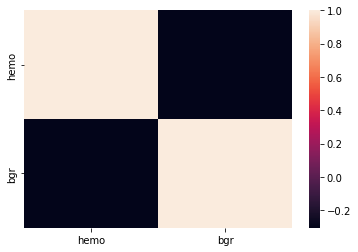

In [253]:
sns.heatmap(kcorr)

In [254]:
#this needs to be corrected because we are supposed to have only 2 classes
kidney.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [255]:
kidney

,hemo,bgr,classification
0,15.4,121.0,ckd
1,11.3,NaN,ckd
2,9.6,423.0,ckd
3,11.2,117.0,ckd
4,11.6,106.0,ckd
...,...,...,...
395,15.7,140.0,notckd
396,16.5,75.0,notckd
397,15.8,100.0,notckd
398,14.2,114.0,notckd


###### Data cleaning

In [256]:
kidney.isna().sum()

hemo              52
bgr               44
classification     0
dtype: int64

In [257]:
#fill the null values with the previous values
kidney.fillna(method='bfill',inplace=True)
kidney.isna().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19480\1189660003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney.fillna(method='bfill',inplace=True)


hemo              0
bgr               0
classification    0
dtype: int64

In [258]:
kidney.shape

(400, 3)

In [259]:
#now we have cleaned data
#we have to preproces this data and do the training

In [260]:
kidney.describe(include=['object'])

,classification
count,400
unique,3
top,ckd
freq,248


In [261]:
classification = np.array(kidney['classification'])

In [262]:
for i in range(len(classification)):
    if classification[i]=='ckd\t':
        classification[i]='ckd'

In [263]:
kidney['classification']=classification

C:\Users\Admin\AppData\Local\Temp\ipykernel_19480\2389431319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney['classification']=classification


In [264]:
kidney.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [265]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [266]:
lab = LabelEncoder()
mms = MinMaxScaler()

In [267]:
kidney['classification']=lab.fit_transform(kidney['classification'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_19480\4147246062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney['classification']=lab.fit_transform(kidney['classification'])


In [268]:
kidney.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,12.388500,147.585000,0.375000
std,2.865265,79.444928,0.484729
min,3.100000,22.000000,0.000000
25%,10.400000,99.000000,0.000000
50%,12.500000,120.000000,0.000000
75%,14.800000,163.500000,1.000000
max,17.800000,490.000000,1.000000


In [269]:
cols = kidney.columns
cols

Index(['hemo', 'bgr', 'classification'], dtype='object')

In [270]:
for i in cols:
    kidney[i]=mms.fit_transform(kidney[[i]])

C:\Users\Admin\AppData\Local\Temp\ipykernel_19480\946434907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney[i]=mms.fit_transform(kidney[[i]])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19480\946434907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney[i]=mms.fit_transform(kidney[[i]])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19480\946434907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [271]:
kidney.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,0.631871,0.268344,0.375000
std,0.194916,0.169754,0.484729
min,0.000000,0.000000,0.000000
25%,0.496599,0.164530,0.000000
50%,0.639456,0.209402,0.000000
75%,0.795918,0.302350,1.000000
max,1.000000,1.000000,1.000000


In [272]:
# splitting the data for training and validation
from sklearn.model_selection import train_test_split

In [273]:
y = kidney.pop('classification')

In [274]:
X = kidney

In [275]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [276]:
#now we have train and validation sets so we can deploy models

In [277]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
dtc = DecisionTreeClassifier(random_state=42,max_leaf_nodes=7,min_samples_leaf=13)
knn = KNeighborsClassifier(n_neighbors=7)
svc = SVC()

In [278]:
knn.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=7)

In [279]:
#now we have trained knn model

In [280]:
dtc.fit(X=X_train,y=y_train)

DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=13, random_state=42)

In [281]:
#now we have trined decision tree classifier

In [282]:
svc.fit(X=X_train,y=y_train)

SVC()

In [283]:
#now we have trained support vector classifier

In [284]:
# predictions

In [285]:
knn_ypred = knn.predict(X_test)
dtc_ypred = dtc.predict(X_test)
svc_ypred = svc.predict(X_test)

In [286]:
#now checking the metrics like accuracy and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [287]:
#Knn
knn_acc = accuracy_score(y_test,knn_ypred)
print(f'Accuracy score : {knn_acc}')

Accuracy score : 0.9625


<AxesSubplot:>

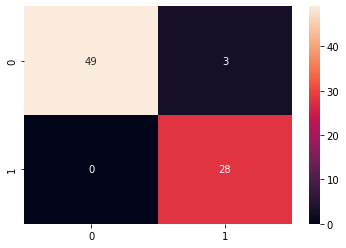

In [289]:
knn_conf = confusion_matrix(y_test,knn_ypred)
sns.heatmap(knn_conf,cbar=True,annot=True)

In [291]:
print('The confusion matrix is :')
knn_conf

The confusion matrix is :


array([[49,  3],
       [ 0, 28]], dtype=int64)

In [292]:
# dtc
dtc_acc = accuracy_score(y_test,dtc_ypred)
print(f'Accuracy score : {dtc_acc}')

Accuracy score : 0.95


<AxesSubplot:>

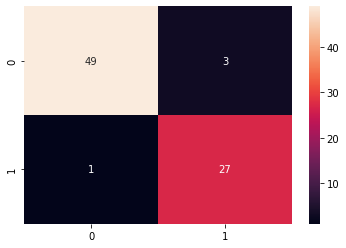

In [293]:
dtc_conf = confusion_matrix(y_test,dtc_ypred)
sns.heatmap(dtc_conf,cbar=True,annot=True)

In [294]:
print('The confusion matrix is :')
dtc_conf

The confusion matrix is :


array([[49,  3],
       [ 1, 27]], dtype=int64)

In [295]:
#svc
svc_acc = accuracy_score(y_test,svc_ypred)
print(f'Accuracy score : {svc_acc}')

Accuracy score : 0.95


<AxesSubplot:>

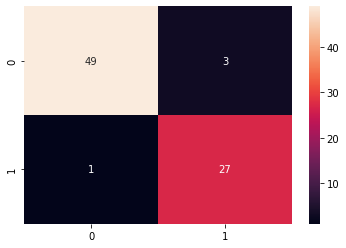

In [296]:
svc_conf = confusion_matrix(y_test,svc_ypred)
sns.heatmap(svc_conf,cbar=True,annot=True)

In [297]:
print('The confusion matrix is :')
svc_conf

The confusion matrix is :


array([[49,  3],
       [ 1, 27]], dtype=int64)

####    Alice has Haemoglobin 0 and Glucose levels 1.1 standard deviations above average, find if Alice is likely to have CKD

Given that Alice has heamoglobin 0 std's above average and 1.1 std's above average
so heamoglobin is (0*std)+(mean(heamoglobin)
and glucose is (1.1*std)+mean(glucose)

In [298]:
hem = np.array(kidney['hemo'])
glu = np.array(kidney['bgr'])

In [300]:
s_h = np.std(hem)
g_h = np.std(glu)
s_m = np.mean(hem)
g_m = np.mean(glu)

In [313]:
ali_h = (0*s_h)+s_m
ali_g = (1.1*g_h)+g_m
alice = pd.DataFrame({
    'hemo':[ali_h],
    'bgr':[ali_g]
})
alice

,hemo,bgr
0,0.631871,0.45484


In [314]:
#now let us predict if alice has the disease or not

In [316]:
#knn
ali_knn = knn.predict(alice)
ali_dtc = dtc.predict(alice)
ali_svc = svc.predict(alice)

In [317]:
print(f'Prediction of disease in KNN : {ali_knn}')
print(f'Prediction of disease in KNN : {ali_dtc}')
print(f'Prediction of disease in KNN : {ali_svc}')

Prediction of disease in KNN : [0.]
Prediction of disease in KNN : [0.]
Prediction of disease in KNN : [0.]


From the above predictions it is clear that Alice doesnot have tha disease beacuse all the predictions are 0.
##### So alice doesnot have the disease

###### Q 5

Prepare a  classifier model  for wine dataset – wine.csv.

In [348]:
wine = pd.read_csv('Wine.csv')

In [349]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [350]:
wine.shape

(178, 14)

In [351]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [352]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [353]:
cols = wine.columns
len(cols)

14

In [354]:
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [355]:
#We dont have any missing data so we can directly go for scaling
#we have already imported the minmax scaler above. So no need to import now

In [356]:
for i in cols[:12]:
    wine[i]= mms.fit_transform(wine[[i]])
wine['Customer_Segment']=lab.fit_transform(wine[['Customer_Segment']])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [357]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,746.893258,0.938202
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,314.907474,0.775035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,278.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,500.500000,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,673.500000,1.000000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,985.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1680.000000,2.000000


In [358]:
#we have already imported the knn, decisiontree and support vector classifier above.
#So we can proceed for splitting the data and training

In [359]:
wy = wine.pop('Customer_Segment')
wX = wine

In [360]:
wy.unique()

array([0, 1, 2], dtype=int64)

In [361]:
X_wtrain,X_wtest,y_wtrain,y_wtest = train_test_split(wX,wy,test_size=0.3)

In [362]:
#knn
knn.fit(X_wtrain,y_wtrain)

KNeighborsClassifier(n_neighbors=7)

In [364]:
knw_pred = knn.predict(X_wtest)

In [365]:
#metrics testing
knw_acc = accuracy_score(y_wtest,knw_pred)
print(f'The accuuracy of the model is {knw_acc}')

The accuuracy of the model is 0.7407407407407407


In [366]:
w_knnmat = confusion_matrix(y_wtest,knw_pred)

<AxesSubplot:>

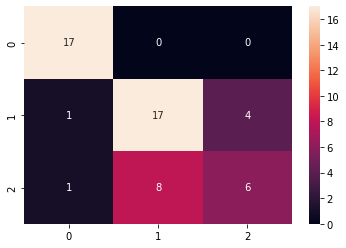

In [368]:
sns.heatmap(w_knnmat,annot=True,cbar = True)

In [369]:
print('Confusion matrix is : ')
w_knnmat

Confusion matrix is : 


array([[17,  0,  0],
       [ 1, 17,  4],
       [ 1,  8,  6]], dtype=int64)

In [372]:
#dtc
dtc.fit(X_wtrain,y_wtrain)

DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=13, random_state=42)

In [373]:
dtw_pred = dtc.predict(X_wtest)

In [374]:
#metrics
dtc_acc = accuracy_score(y_wtest,dtw_pred)
print(f'The accuuracy of the model is {dtc_acc}')

The accuuracy of the model is 0.9814814814814815


<AxesSubplot:>

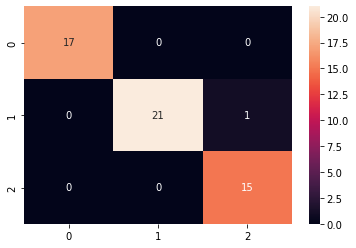

In [376]:
dtw_mat = confusion_matrix(y_wtest,dtw_pred)
sns.heatmap(dtw_mat,annot=True,cbar = True)

In [377]:
print('Confusion matrix is : ')
dtw_mat

Confusion matrix is : 


array([[17,  0,  0],
       [ 0, 21,  1],
       [ 0,  0, 15]], dtype=int64)

In [378]:
#svc
svc.fit(X_wtrain,y_wtrain)
scw_predict = svc.predict(X_wtest)

In [379]:
scwacc = accuracy_score(y_wtest,scw_predict)
print(f'The accuuracy of the model is {scwacc}')

The accuuracy of the model is 0.7407407407407407


<AxesSubplot:>

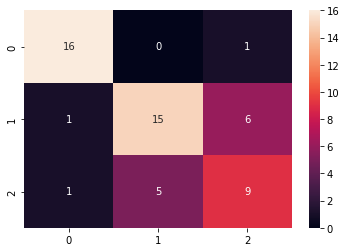

In [380]:
scw_mat = confusion_matrix(y_wtest,scw_predict)
sns.heatmap(scw_mat,annot=True,cbar = True)

In [381]:
print('Confusion matrix is : ')
scw_mat

Confusion matrix is : 


array([[16,  0,  1],
       [ 1, 15,  6],
       [ 1,  5,  9]], dtype=int64)

#### D. Regression

##### Q7

##### Predict Home prices employing multiple regression. Compare performance with a KNN  Regressor model used for prediction. Draw a residual plot for these predictions and offer your comments. 

In [382]:
home= pd.read_csv('Housing.csv')

In [389]:
home.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [384]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [385]:
home.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [393]:
obj_colums = home.describe(include='object').columns

In [394]:
home.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [395]:
obj_colums

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [396]:
#there are no missing values so we can go to encoding
#first let us encode columns with object type data

In [397]:
for i in obj_colums:
    home[i]=lab.fit_transform(home[[i]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [400]:
#now let us use min max scaler for scaling the data

In [402]:
all_cols = home.columns
all_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [404]:
for i in all_cols[1:]:
    home[i]=mms.fit_transform(home[[i]])

In [405]:
home.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,0.240587,0.393028,0.095413,0.268502,0.858716,0.177982,0.350459,0.045872,0.315596,0.231193,0.234862,0.534862
std,1.870440e+06,0.149151,0.147613,0.167490,0.289164,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.380686
min,1.750000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,0.202749,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000
max,1.330000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [406]:
#now the data is ready for traing
yh= home.pop('price')
Xh = home

In [407]:
Xh_train,Xh_test,yh_train,yh_test = train_test_split(Xh,yh,test_size=0.2,random_state=42)

In [408]:
Xh_train.shape

(436, 12)

In [410]:
Xh_test.shape

(109, 12)

In [411]:
yh_train.shape

(436,)

In [413]:
yh_test.shape

(109,)

In [414]:
#let us import knn and multiple regressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
regressor = LinearRegression()
knr = KNeighborsRegressor(n_neighbors=7)

In [415]:
#first linear regressor
regressor.fit(Xh_train,yh_train)
home_pred = regressor.predict(Xh_test)

In [416]:
#now KNN regressor
knr.fit(Xh_train,yh_train)
khome_pred = knr.predict(Xh_test)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


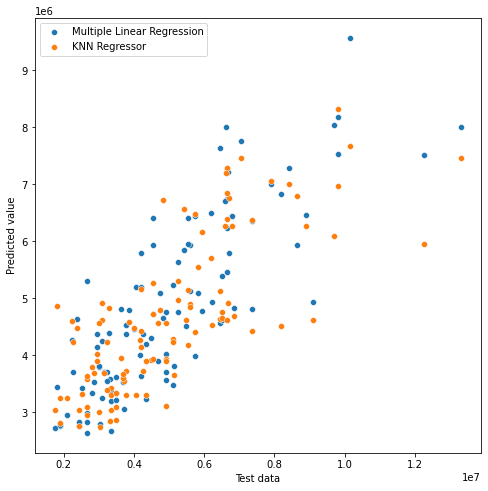

In [424]:
#plotting the results in a plot to see the relation
plt.figure(figsize=(8,8))
sns.scatterplot(yh_test,home_pred)
sns.scatterplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


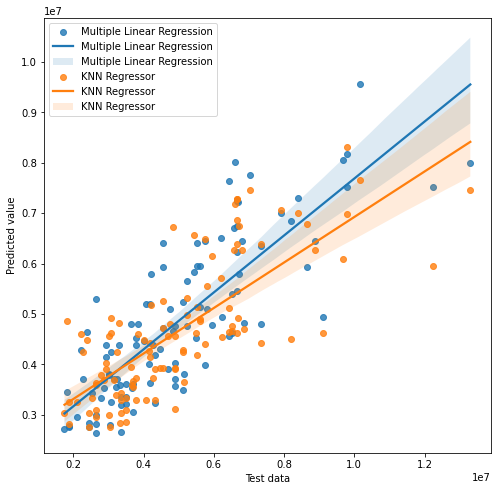

In [428]:
plt.figure(figsize=(8,8))
sns.regplot(yh_test,home_pred)
sns.regplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','Multiple Linear Regression','Multiple Linear Regression','KNN Regressor','KNN Regressor','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

In [429]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [430]:
#mlr
rmae = mean_absolute_error(yh_test,home_pred)
rmse = mean_squared_error(yh_test,home_pred)
rr2 = r2_score(yh_test,home_pred)

In [431]:
#knnr
kmae = mean_absolute_error(yh_test,khome_pred)
kmse = mean_squared_error(yh_test,khome_pred)
kr2 = r2_score(yh_test,khome_pred)

In [434]:
metrics = {'MAE':[rmae,kmae],'MSE':[rmse,kmse],'R2 score':[rr2,kr2]}
metrics_df = pd.DataFrame(metrics)
metrics_df.index=['Multiple Linear Regression','KNN Regressor']
metrics_df

,MAE,MSE,R2 score
Multiple Linear Regression,9.796797e+05,1.771751e+12,0.649475
KNN Regressor,1.089468e+06,2.402113e+12,0.524764


#### Comments : 

We can observe that MAE is better for KNN regressor but MSE and R2 score are better for Multiple Regression.

###### So in this case Multiple Regression is better

#### Q 8

Implement a logistic regression model – employ scikit-learn library functions. 

In [489]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version=1, as_frame=True)
titanic_df = titanic['data']
titanic_df['survived'] = titanic['target']

In [490]:
titanic_df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0


In [491]:
#name is definetly not needed so remove it
titanic_df.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)
 
# remove less interesting features
titanic_df.drop(['name','ticket','home.dest'], axis=1, inplace=True)

In [492]:
titanic_df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1.0,female,29.0000,0.0,0.0,211.3375,S,1
1,1.0,male,0.9167,1.0,2.0,151.5500,S,1
2,1.0,female,2.0000,1.0,2.0,151.5500,S,0
3,1.0,male,30.0000,1.0,2.0,151.5500,S,0
4,1.0,female,25.0000,1.0,2.0,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,1.0,0.0,14.4542,C,0
1305,3.0,female,NaN,1.0,0.0,14.4542,C,0
1306,3.0,male,26.5000,0.0,0.0,7.2250,C,0
1307,3.0,male,27.0000,0.0,0.0,7.2250,C,0


In [493]:
titanic_df['sex']=lab.fit_transform(titanic_df[['sex']])
titanic_df['embarked']=lab.fit_transform(titanic_df[['embarked']])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [494]:
for i in titanic_df.columns[:-1]:
    titanic_df[i]=mms.fit_transform(titanic_df[[i]])

In [495]:
titanic_df.describe()

,pclass,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,0.647441,0.644003,0.372206,0.062357,0.042781,0.064988,0.498345
std,0.418918,0.478997,0.180545,0.130207,0.096173,0.101026,0.272043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.260960,0.000000,0.000000,0.015412,0.333333
50%,1.000000,1.000000,0.348643,0.000000,0.000000,0.028213,0.666667
75%,1.000000,1.000000,0.486430,0.125000,0.000000,0.061045,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [496]:
titanic_df['survived'].unique()

['1', '0']
Categories (2, object): ['0', '1']

In [497]:
titanic_df.isna().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      0
survived      0
dtype: int64

In [498]:
age = titanic_df['age']
ages = [i for i in age if (i>=0 and i<=1)]

In [499]:
avg_age = np.array(ages).mean()
for i in range(len(age)):
    if (age[i]>=0 and age[i]<=1):
        pass
    else:
        age[i]=avg_age

C:\Users\Admin\AppData\Local\Temp\ipykernel_19480\797118774.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i]=avg_age


In [500]:
titanic_df['age']=age

In [501]:
titanic_df.dropna(inplace=True)

In [502]:
#now we have cleaned data for training
yt= titanic_df.pop('survived')
Xt = titanic_df

In [503]:
Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size=0.2)

In [504]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [505]:
logr.fit(Xt_train,yt_train)

LogisticRegression()

In [506]:
tita_pred = logr.predict(Xt_test)

In [507]:
log_acc=accuracy_score(yt_test,tita_pred)
print(f'Accuracy of the model is {log_acc}')

Accuracy of the model is 0.7824427480916031


<AxesSubplot:>

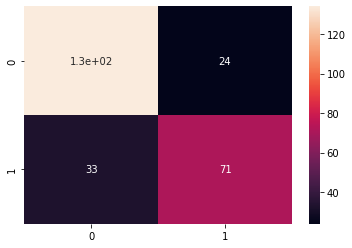

In [509]:
log_conf = confusion_matrix(yt_test,tita_pred)
sns.heatmap(log_conf,annot=True,cbar=True)

In [510]:
print('The confusion matrix is : ')
log_conf

The confusion matrix is : 


array([[134,  24],
       [ 33,  71]], dtype=int64)

This is the logistic regression model

## END OF ASSIGNMENT